<a href="https://colab.research.google.com/github/michaji/medical-insurance-cost-analysis/blob/main/global_ai_hub_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Necessary Libraries

In [71]:
#Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing libraries
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

#ML Models
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor 

#Performance evaluation libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

In [22]:
# Importing the csv dataset
df = pd.read_csv("../input/insurance/insurance.csv")

In [4]:
# Checking the shape of the dataset (Number of Rows, Columns)
df.shape

(1338, 7)

In [5]:
#Sneek peek into the first five rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#categorical columns are Sex, Smoker and region

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Checking the statistical description of the numeric data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# Checking the statistical description of the numeric data indexing it by the column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Exploratory Data Analysis

In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
#checking for unique values
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


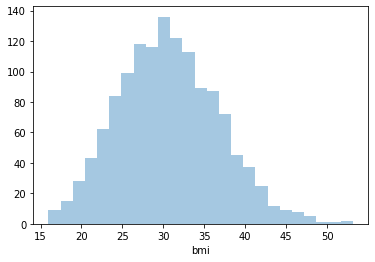

In [12]:
#distribution of bmi is approximately normal: majority of respondent having a bmi between 30-35
sns.distplot(df['bmi'], kde = False)
plt.show()

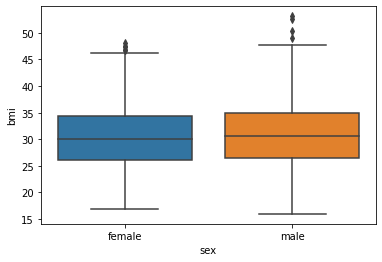

In [13]:
#A plot showing the relationship between the bmi and the sex
sns.boxplot(y=df['bmi'], x=df['sex'])
plt.show()

 - This shows that majority of the sex distribution have their bmi to range between 30 and 35

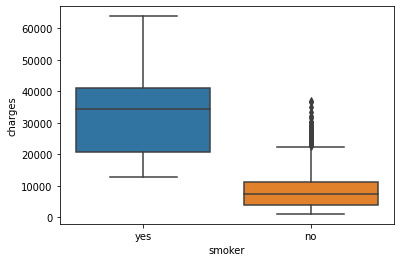

In [14]:
# Checking the relationship between the charges and the smoker 
sns.boxplot(y=df['charges'], x=df['smoker'])
plt.show()

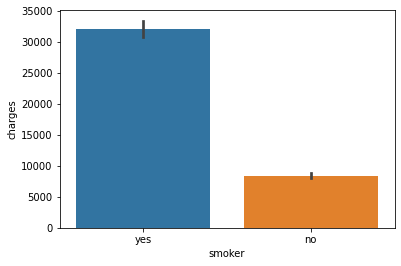

In [15]:
# Checking the variation of the charges between the smokers and the non-smokers
sns.barplot(data=df, x='smoker', y='charges')
plt.show()

- We can see that the charges for smokers is higher than that of the non-smokers

In [27]:
#Southeast has highest number of smokers and non-smokers
#distribution of smokers and non-smokers in the regions are the same
pd.crosstab(df['region'], df['smoker'])

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<AxesSubplot:xlabel='region'>

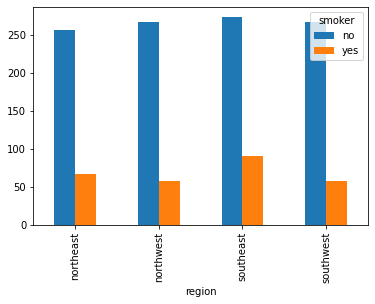

In [28]:
pd.crosstab(df['region'], df['smoker']).plot.bar()

<AxesSubplot:xlabel='sex', ylabel='bmi'>

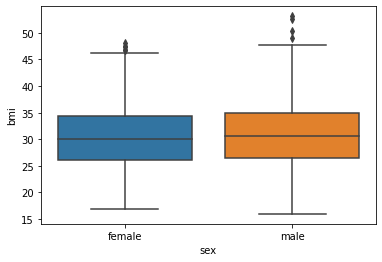

In [29]:
#bmi and sex
#The bmi value for both male and female are very close, 
sns.boxplot(y=df['bmi'], x=df['sex'])

<AxesSubplot:xlabel='sex', ylabel='bmi'>

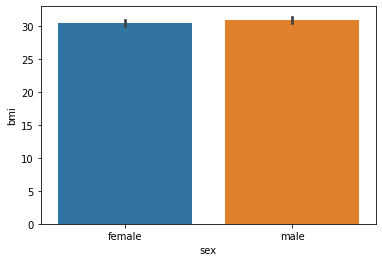

In [30]:
#bmi and sex
sns.barplot(y=df['bmi'], x=df['sex'])

<AxesSubplot:xlabel='region'>

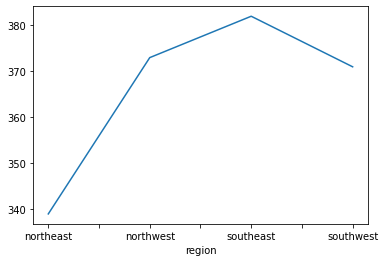

In [31]:
#Region with most children
df.groupby('region').sum()['children'].plot()
#the southeast region has the most children

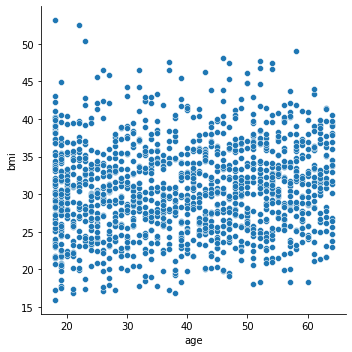

In [32]:
#age and bmi
sns.relplot(data =df, x='age', y='bmi')
#distribution  of age and bmi shows no notable pattern

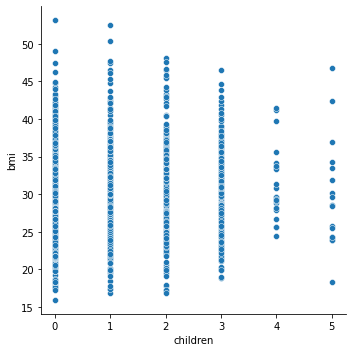

In [33]:
# A plot showing the relationship between bmi and children
sns.relplot(data =df, x='children', y='bmi')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

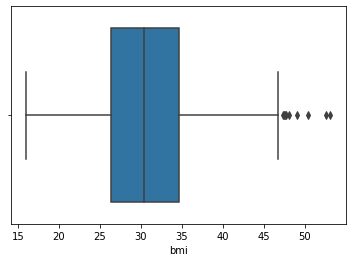

In [34]:
#outlier in bmi
sns.boxplot(df['bmi'])
plt.show()
#The bmi variable has outliersacorr

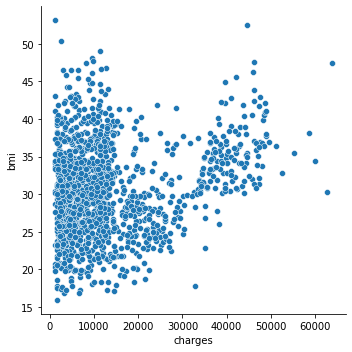

In [35]:
#bmi and charges
#low bmi is associated with people with lower charges
sns.relplot(data =df, x='charges', y='bmi')
plt.show()

<AxesSubplot:xlabel='region', ylabel='bmi'>

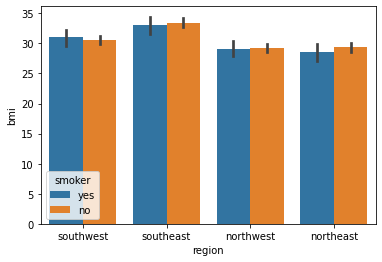

In [36]:
#southeastern region have the highest bmi value
sns.barplot(data =df, x='region', y='bmi', hue = 'smoker')
plt.show()

### Encoding Categorical Variables

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
df1 = df.copy()

In [34]:
# Label Encoding for the Smoker Variable
le = LabelEncoder()
df1['smoker'] = le.fit_transform(df1['smoker'])
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [35]:
# Using One-Hot Encoding for the sex and region variable to create dummies
df1 = pd.get_dummies(df1, columns = ['sex', 'region'])

In [36]:
df1.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,1,0,0,0,0,1
1,18,33.770,1,0,1725.55230,0,1,0,0,1,0
2,28,33.000,3,0,4449.46200,0,1,0,0,1,0
3,33,22.705,0,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,0,3866.85520,0,1,0,1,0,0


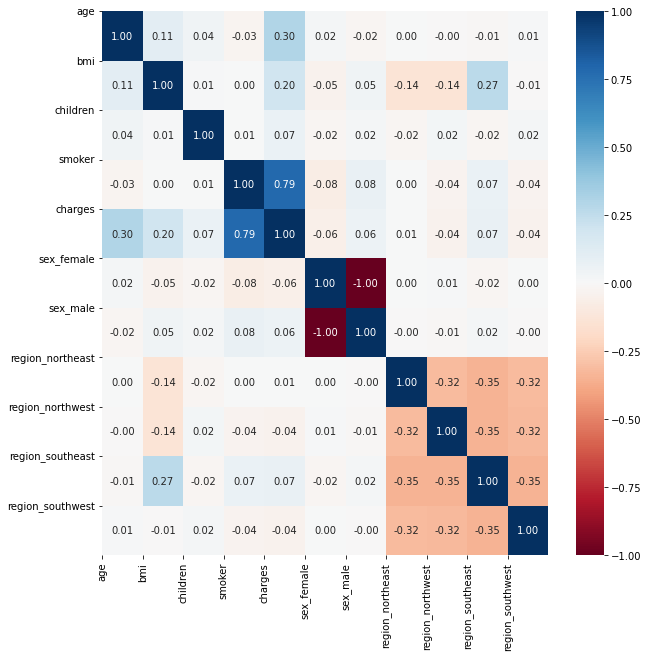

In [39]:
corr = df1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);

#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)

#show plot
plt.show()

In [40]:
#splitting the features and label training data
X = df1.drop(['charges'], axis = 1)
y = df1['charges']

#features = X.columns

In [43]:
# Normalizing Input Features using Min-Max Scaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
X_scaled[0:5]

array([[0.02173913, 0.3212268 , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.47914985, 0.2       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 0.45843422, 0.6       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 0.18146355, 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 0.34759214, 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ]])

In [46]:
#split into training and test set
x_train, x_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state = 42, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1070, 10), (1070,), (268, 10), (268,))

In [47]:
# Initialize the models

lr = LinearRegression()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgb = XGBRegressor()
ctb = CatBoostRegressor(silent=True)
lgb = LGBMRegressor()


In [48]:
# Fitting the model
lr.fit(x_train, y_train)
gbr.fit(x_train, y_train)
rfr.fit(x_train, y_train)

xgb.fit(x_train, y_train)
ctb.fit(x_train, y_train)
lgb.fit(x_train, y_train)

LGBMRegressor()

In [49]:
# Using the fitted models to make predictions
lr_pred = lr.predict(x_test)
gbr_pred = gbr.predict(x_test)
rfr_pred = rfr.predict(x_test)
xgb_pred = xgb.predict(x_test)
ctb_pred = ctb.predict(x_test)
lgb_pred = lgb.predict(x_test)

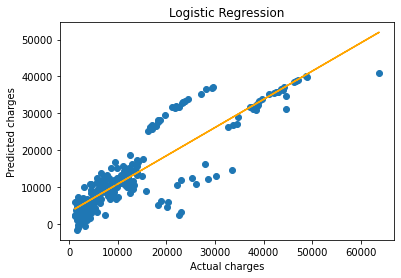

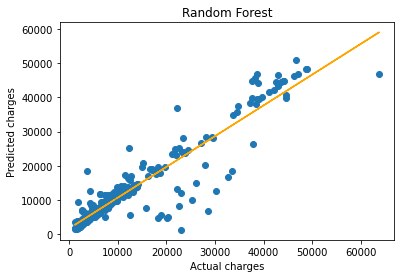

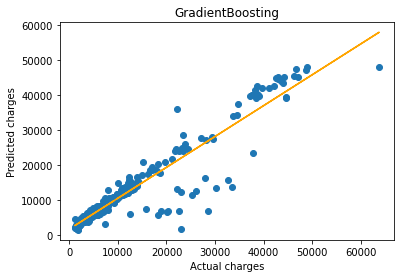

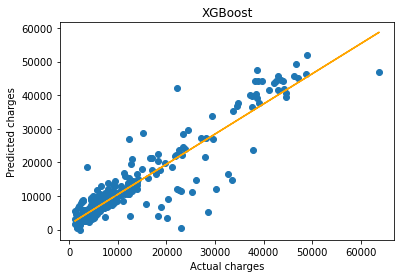

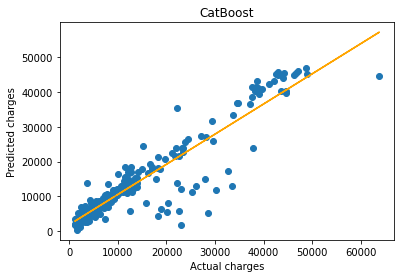

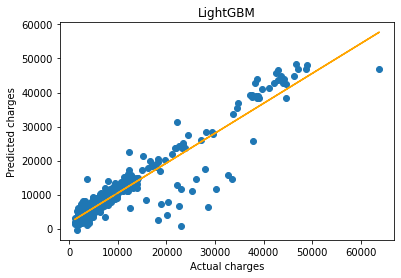

In [50]:
def regline(pred, title):
    plt.scatter(y_test, pred)
    plt.xlabel('Actual charges')
    plt.ylabel('Predicted charges')
    plt.title(title)
    z = np.polyfit(y_test, pred, 1)
    p = np.poly1d(z)
    plt.plot(y_test, p(y_test), color = 'Orange')
    plt.show()
    
regline(lr_pred, 'Logistic Regression')
regline(rfr_pred, 'Random Forest')
regline(gbr_pred, 'GradientBoosting')
regline(xgb_pred, 'XGBoost')
regline(ctb_pred, 'CatBoost')
regline(lgb_pred, 'LightGBM')

In [51]:
# Metrics for evaluating the error

# Mean absolute error
lr_mae = mean_absolute_error(y_test, lr_pred)
gbr_mae = mean_absolute_error(y_test, gbr_pred)
rfr_mae = mean_absolute_error(y_test, rfr_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
ctb_mae = mean_absolute_error(y_test, ctb_pred)
lgb_mae = mean_absolute_error(y_test, lgb_pred)

# Root mean squared error
lr_rms = np.sqrt(mean_squared_error(y_test, lr_pred))
gbr_rms = np.sqrt(mean_squared_error(y_test, gbr_pred))
rfr_rms = np.sqrt(mean_squared_error(y_test, rfr_pred))
xgb_rms = np.sqrt(mean_squared_error(y_test, xgb_pred))
ctb_rms = np.sqrt(mean_squared_error(y_test, ctb_pred))
lgb_rms = np.sqrt(mean_squared_error(y_test, lgb_pred))

#Coefficient of Determination

lr_r2 = r2_score(y_test, lr_pred)
gbr_r2 = r2_score(y_test, gbr_pred)
rfr_r2 = r2_score(y_test, rfr_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
ctb_r2 = r2_score(y_test, ctb_pred)
lgb_r2 = r2_score(y_test, lgb_pred)


In [52]:
dict_ = {'Algorithm':['LinearRegression', 'GradientBoostingRegressor', 'RandomForestRegressor', 'XGBoost', 'CatBoost', 'LightGBM'], 
         'RMSE_Score':[lr_rms, gbr_rms, rfr_rms, xgb_rms, ctb_rms, lgb_rms],
         'MAE_Score': [lr_mae, gbr_mae, rfr_mae, xgb_mae, ctb_mae, lgb_mae],
         'R2_Score':[lr_r2, gbr_r2, rfr_r2, xgb_r2, ctb_r2, lgb_r2]
        }

df = pd.DataFrame(dict_, index=[1,2,3,4,5,6])
df

,Algorithm,RMSE_Score,MAE_Score,R2_Score
1,LinearRegression,5796.284659,4181.194474,0.783593
2,GradientBoostingRegressor,4331.232239,2407.679804,0.879164
3,RandomForestRegressor,4607.135670,2495.735788,0.863279
4,XGBoost,4950.252015,2800.307975,0.842157
5,CatBoost,4644.613188,2644.238019,0.861046
6,LightGBM,4571.587120,2605.888111,0.865381


### K-Fold Cross Validation

In [54]:
import sklearn

In [56]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [61]:
# Defining the metric of the scorer
metric = make_scorer(mean_absolute_error)

In [60]:
gbr_cv = cross_val_score(gbr, X, y, scoring = metric, cv = 5)
gbr_cv = [np.around(i, decimals=3) for i in gbr_cv]

rfr_cv = cross_val_score(rfr, X, y, scoring = metric, cv = 5)
rfr_cv = [np.around(i, decimals=3) for i in rfr_cv]

lr_cv = cross_val_score(lr, X, y, scoring = metric, cv = 5)
lr_cv = [np.around(i, decimals=3) for i in lr_cv]

ctb_cv = cross_val_score(ctb, X, y, scoring = metric, cv = 5)
ctb_cv = [np.around(i, decimals=3) for i in ctb_cv]


xgb_cv = cross_val_score(xgb, X, y, scoring = metric, cv = 5)
xgb_cv = [np.around(i, decimals=3) for i in xgb_cv]

lgb_cv = cross_val_score(lgb, X, y, scoring = metric, cv = 5)
lgb_cv = [np.around(i, decimals=3) for i in lgb_cv]

In [62]:

# Printing out the output of the cv_score
dict_ = {'Algorithm': ['GradientBoostingRegressor', 'RandomForestRegressor', 'LogisticRegression', 'XGBoost', 'CatBoost', 'LightGBM'], 
         'cv_score':[gbr_cv, rfr_cv, lr_cv, xgb_cv, ctb_cv, lgb_cv], 
         'cv_mean':[np.mean(gbr_cv), np.mean(rfr_cv), np.mean(lr_cv), np.mean(xgb_cv), np.mean(ctb_cv), np.mean(lgb_cv)], 
         'cv_std':[np.std(gbr_cv), np.std(rfr_cv), np.std(lr_cv), np.std(xgb_cv), np.std(ctb_cv), np.std(lgb_cv)]
        }
df = pd.DataFrame(dict_, index = [1,2,3,4,5, 6])
df

,Algorithm,cv_score,cv_mean,cv_std
1,GradientBoostingRegressor,"[2551.503, 2796.843, 2226.491, 2471.671, 2478....",2504.9860,182.603034
2,RandomForestRegressor,"[2608.793, 2942.39, 2473.725, 2587.636, 2680.062]",2658.5212,156.647849
3,LogisticRegression,"[4239.552, 4260.807, 4015.773, 4256.17, 4216.312]",4197.7228,92.300229
4,XGBoost,"[3115.442, 3591.2, 2731.677, 2923.674, 2893.25]",3051.0486,296.321768
5,CatBoost,"[2591.813, 2957.774, 2437.001, 2535.323, 2637....",2631.9474,176.152590
6,LightGBM,"[2704.734, 3095.919, 2548.963, 2781.069, 2698....",2765.7400,181.413244


In [69]:
#Create dictionary of parameters
param = {'learning_rate':[0.1, 0.02, 0.05, 0.5, 0.01],
           'n_estimators':[100,300,500,600,750, 900, 1000]}
#Define RandomizedSearch Parameters
tuning = RandomizedSearchCV(estimator = gbr, 
            param_distributions = param, scoring = 'neg_mean_absolute_error',n_jobs=-1, cv=5)
#fit on  training data
tuning.fit(x_train,y_train)

#print to see best parameter and score
print( tuning.best_params_, tuning.best_score_)

{'n_estimators': 300, 'learning_rate': 0.02} -2634.0287475225878


In [72]:
#Create dictionary of parameters
param = {'learning_rate':[0.1, 0.02, 0.05, 0.5, 0.01],
           'n_estimators':[100,300,500,600,750, 900, 1000]}
#Define GridSearch Parameters
tuning = GridSearchCV(estimator = gbr, 
            param_grid = param, scoring = 'neg_mean_absolute_error')
#fit on  training data
tuning.fit(x_train,y_train)

#print to see best parameter and score
print(tuning.best_params_, tuning.best_score_)

{'learning_rate': 0.01, 'n_estimators': 600} -2628.9151692608134


In [49]:
#hyperparameter tunning
hyp_grid = {'n_estimators' : [10,100,200],
           'max_depth' : [3,6,9]}

rand_cv = RandomizedSearchCV(estimator=model_xgb, 
                            param_distributions=hyp_grid,
                            cv=5,
                            scoring='neg_mean_absolute_error')

rand_cv.fit(x_train, y_train)



/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': [3, 6, 9],
                                        'n_estimators': [10, 100, 200]},
                   scoring='neg_mean_absolute_error')

In [50]:
best = rand_cv.best_estimator_

best.fit(x_train, y_train)

pp = best.predict(x_test)

print(mean_absolute_error(y_test, pp))

2643.770118614777
